# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, February 1, 2017

SURVEY:
1) Python
2) Numpy/sklearn
3) IPython Notebooks

## Perceptron
### Key Points
SETUP: We have a set of data points $\{(x_{1}, y_{1}), (x_{2}, y_{2}), ... , (x_{n}, y_{n})\}$, where $x_{i} \in R^{d}$ are the feature vectors and $y_{i} \in \{0, 1\}$ are the class labels.

MODEL: $\hat{y} = sign(w.x + b)$, where $w, b \in R^{d}$

DISTANCE FUNCTION: -$(y - \hat{y}) * (w.x + b)$

LEARNING RULE: $w \leftarrow w + \eta * (y - \hat{y}) * x$

In [106]:
# Loading the required libraries

%matplotlib inline 

import numpy
import matplotlib.pyplot as plot

import matplotlib
#matplotlib.rc('text', usetex=True)

In [127]:
# Setting a random seed
numpy.random.seed(1234)

## 1. Data Preparation

In [108]:
# Sample dataset preparation

from sklearn.datasets import make_blobs
n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)

In [109]:
# Visualize data 
def vis_data(x, y, c='r', open_figure=False):
    if open_figure:
        plot.figure()
    plot.hold('on')
    for x_, y_ in zip(x, y):
        plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')
    plot.title('giwengieb')
    plot.show()

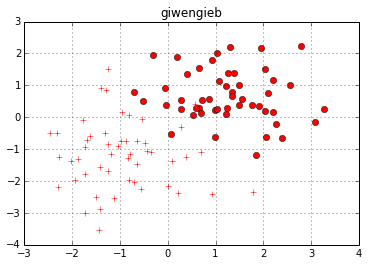

In [110]:
# Visualize TRAINING data
vis_data(x_train, y_train, open_figure=True)

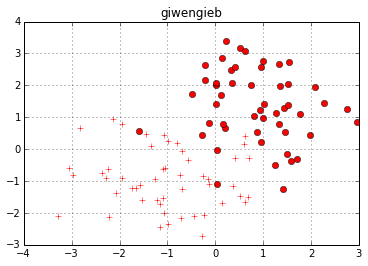

In [111]:
# Visualize TEST data
vis_data(x_test, y_test, open_figure=True)

## 2. Model Definition

In [112]:
'''
Basic functionality of the perceptron model.

INPUT: Feature vector (x) and a weight vector (w)
OUTPUT: Returns the sign of w.x or the value of w.x
'''

def perceptron(x, w, pre=False):
    def sign(y):
        return numpy.maximum(0., numpy.sign(y))
    
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sign(y)

In [113]:
'''
Distance function for the perceptron model.

INPUT: True labels of data points, feature vectors of data points and a weight vector
OUTPUT: Value of the distance for each data point or the average distance
'''

def perceptron_dist(y, x, w, avg=False):
    y_ = perceptron(x, w)
    d = -(y - y_) * perceptron(x, w, pre=True)
    if not avg:
        return d
    return numpy.mean(d)

In [114]:
'''
Learning rule for the perceptron model.

INPUT: True labels of data points, feature vectors of data points and a weight vector
OUTPUT: Update direction for the weight vector
'''

def perceptron_rule(y, x, w):
    y_ = perceptron(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y - y_)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y - y_)
    return dw

## 3. Learning Process

In [115]:
# Random initial weight vector
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

# Training Parameters
n_iter = 1000
eta = .1     # Learning rate
old_cost = numpy.Inf

# Training
for ni in range(n_iter):
    pred_y = perceptron(x_train, w)    # Dimension of 'pred_y'?
    
    w += eta * perceptron_rule(y_train, x_train, w)  # Updating the weight vector 
    
    cost = perceptron_dist(y_train, x_train, w, avg=True)
    
    print('Perceptron cost {} after iteration {}'.format(cost, ni))
    
    if cost < 1e-16 or cost / old_cost >= 1.:
        print('Converged')
        break
    old_cost = cost

Perceptron cost 0.111896683664 after iteration 0
Perceptron cost 0.0916175637931 after iteration 1
Perceptron cost 0.0785364930516 after iteration 2
Perceptron cost 0.0713160301485 after iteration 3
Perceptron cost 0.0656768035291 after iteration 4
Perceptron cost 0.0601375428795 after iteration 5
Perceptron cost 0.0556196487196 after iteration 6
Perceptron cost 0.0513837317683 after iteration 7
Perceptron cost 0.0471478148169 after iteration 8
Perceptron cost 0.0429118978655 after iteration 9
Perceptron cost 0.0386759809141 after iteration 10
Perceptron cost 0.0344533973983 after iteration 11
Perceptron cost 0.0311141923425 after iteration 12
Perceptron cost 0.0288950723854 after iteration 13
Perceptron cost 0.0267529596414 after iteration 14
Perceptron cost 0.0251495283097 after iteration 15
Perceptron cost 0.023546096978 after iteration 16
Perceptron cost 0.0219426656463 after iteration 17
Perceptron cost 0.0203392343146 after iteration 18
Perceptron cost 0.0187358029829 after itera

In [116]:
print('Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)))
print('Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w)))

Initial: -0.53 x_1 + 0.35 x_2 + 0.0 = 0
Final: -0.053 x_1 + -0.044 x_2 + -0.004 = 0


## 4. Visualize Final Model

In [117]:
def vis_hyperplane(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

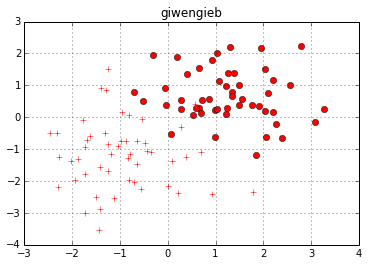

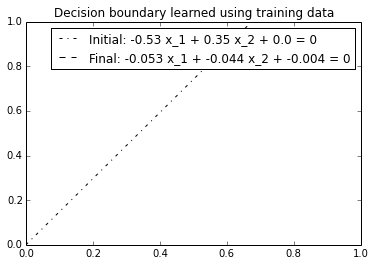

In [118]:
# Decision boundary learned using training data

plot.figure()

vis_data(x_train, y_train)

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')


plot.legend([plt0, plt1], [
        'Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)),
        'Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary learned using training data')
plot.show()

## 5. Testing

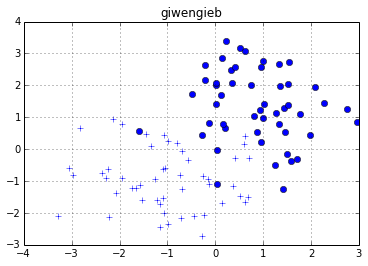

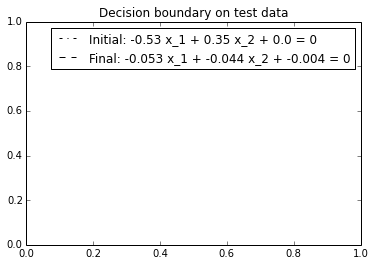

In [119]:
# Decision boundary on test data

plot.figure()

vis_data(x_test, y_test, 'b')

plt1 = vis_hyperplane(w, 'k--')


plot.legend([plt0, plt1], [
        'Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)),
        'Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary on test data')
plot.show()

In [120]:
train_error = numpy.sum(numpy.abs(perceptron(x_train, w) - y_train)) / numpy.float(len(y_train))
test_error = numpy.sum(numpy.abs(perceptron(x_test, w) - y_test)) / numpy.float(len(y_test))

print('Training error rate {}, Test error rate {}'.format(train_error, test_error))

Training error rate 0.05, Test error rate 0.06


## 6. HOMEWORK - Use scikit-learn to replicate the above operations

In [121]:
# Use this cell to import required packages of sklearn
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# STEP 1: Create a Perceptron class instance
perceptron = Perceptron(n_iter=n_iter, eta0=eta)


In [123]:
# STEP 2: Fit the perceptron model to the training data
perceptron.fit(x_train, y_train)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=1000, n_jobs=1, penalty=None, random_state=0, shuffle=False,
      verbose=0, warm_start=False)

In [124]:
# STEP 3: Obtain the coefficients of the learned model (read the documentation to find out how)
coeff = perceptron.coef_
coeff = np.insert(coeff,2,perceptron.intercept_)
print coeff
print w

[-0.1930383  -0.40512665  0.        ]
[-0.0529646 -0.0438084 -0.004    ]


In [125]:
# STEP 4: Compare the feature coefficients obtained by sklearn and the custom module we have
print "Custom feature coefficients are %f, %f, %f"%(w[0],w[1],w[2])
print "Sklearn feature coefficients are %f, %f, %f"%(coeff[0],coeff[1],coeff[2])

# Note: Print the equations of the model learned by both implementations and comment about what you observe.
print "The custom module equation is %.2fx + %.2fy + %.2f = 0"%(w[0],w[1],w[2])
print "The sklearn module equation is %.2fx + %.2fy + %.2f = 0"%(coeff[0],coeff[1],coeff[2])


Custom feature coefficients are -0.052965, -0.043808, -0.004000
Sklearn feature coefficients are -0.193038, -0.405127, 0.000000
The custom module equation is -0.05x + -0.04y + -0.00 = 0
The sklearn module equation is -0.19x + -0.41y + 0.00 = 0


TRAINING SCORE IS 0.93
TEST SCORE IS 0.93


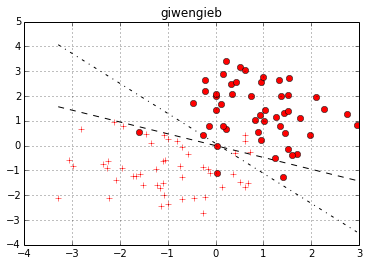

In [126]:
# STEP 5: Predict the class of test data points. Print the TRAINING and TEST accuracy.
pred = perceptron.predict(x_test)

print "TRAINING SCORE IS %.2f"%perceptron.score(x_train, y_train)
print "TEST SCORE IS %.2f"%perceptron.score(x_test, y_test)


x = np.arange(np.amin(x_test[:,0]),np.amax(x_test[:,0]),0.001)
sk_mod = (-coeff[0]/coeff[1])*x + (coeff[2]/coeff[1])
cust_mod = (-w[0]/w[1])*x + (w[2]/w[1])
plt.plot(x,sk_mod,'k--',x,cust_mod,'k-.')
vis_data(x_test,y_test)
